In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# plotting packages

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Assignment - Micolucci Sara 

## 1) Exploratory Data Analysis
### 1.1 Load the Data 

The first step of the procedure is open the file named *Assignment.csv* and then transform it in a DataFrame. The latter is an object of Pandas Library, in particular is a two-dimension tabular data, is useful for representing data in a clear way and makes possible perform all the staitistics related to the data, recover the shape of they and so on...

In [49]:
DF = pd.read_csv('assignment.csv', sep=";")

# check the raw data
print("Size of the dataset (row, col): ", DF.shape)
print("\nFirst 5 rows\n", DF.head(n=5))

Size of the dataset (row, col):  (277, 2)

First 5 rows
    dossier  performance
0        1      2.88099
1        2      2.85309
2        3      2.96310
3        4      2.88473
4        5      2.86781


So i have loaded the first five row of the data. They are composed by a column named **dossier** that represents a particular client's position in the portfolio and a column named **performance** that represents the annual performance of the particular position.

So the data set is formed by 277 values per 2 columns of *Numerical data*.

After loading the data i construct a DataFrame using Pandas.

In [50]:
DF = pd.DataFrame(DF, columns = ['dossier','performance'] )
DF

,dossier,performance
0,1,2.88099
1,2,2.85309
2,3,2.96310
3,4,2.88473
4,5,2.86781
...,...,...
272,273,-0.68131
273,274,-0.68131
274,275,-0.33327
275,276,-0.03177


### 1.2 Compute the statistics and plot the distribution of the data

In this section are reported all the statistics and the distribution plot relative to the data.   

In [51]:
print("\nSummary statistics\n", DF.describe())


Summary statistics
          dossier  performance
count  277.00000   277.000000
mean   139.00000     0.326055
std     80.10722     2.015121
min      1.00000    -2.972140
25%     70.00000    -1.356210
50%    139.00000    -0.367600
75%    208.00000     2.818950
max    277.00000     5.235730


Then there is a plot of the frequency distribution of the portfolio's performance positions.

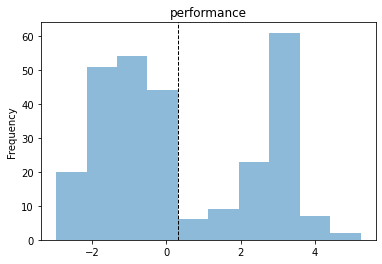

In [52]:
DF['performance'].plot(kind = 'hist', title = 'performance', alpha = 0.5)
plt.axvline(0.326055, color='k', linestyle='dashed', linewidth=1)

From the plot is possible to see that the *performance* feature has a bimodale distrbution, since the plot shows two pick of frequency , one for the positive performance of the positions and another for the negative performance. 


### 1.3 Data standardization

The *standardization* of the data used to perform the analysis is an important step before starting the clusterization process. 
The objective of this procedure is obtain variable expressed in the *same scale* and avoid that higher value of the fature will dominate the process. 

I have used the *z-score normalization* where each standardized value is computed by subtracting the mean of the corresponding feature and then dividing by the standard deviation.

In [53]:
PSD = ( DF['performance'] - DF['performance'].mean()) / DF['performance'].std()
DF['performance'] = PSD
DF

,dossier,performance
0,1,1.267882
1,2,1.254036
2,3,1.308629
3,4,1.269738
4,5,1.261341
...,...,...
272,273,-0.499903
273,274,-0.499903
274,275,-0.327188
275,276,-0.177570


I have performed the standardization also of the indexation column in order to obtain the whole data set of the same size and hence construct a scatter plot with variables expressed in the same way.

## 2)  K-means clustering method

The K-means clustering is an *Unsupervised Learning* method used to classify data, it works taking as input only knows outcomes. 
The aggragation is maid looking at sort of similarities that the pattern shows, so data are grouped into **Clusters** that are simply set of data with common characteristcs.

The first thing to do is to infer a number of **K** possible **Centroids** that could represents our distribution of Feature, then implement the algorithm Kmeans of Scikit-learn. 
This algorithm works by performing iterative calculations in order to optimize the position of the Centroids in the cluster. In particular every data point is allocated to each of the clusters through reducing the in-cluster sum of squares so it allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

### 2.1 Scatter plot and definition of k

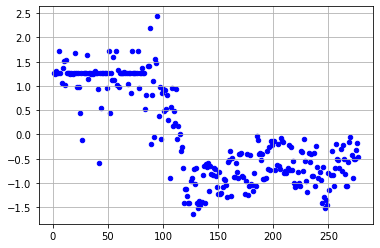

In [55]:
plt.scatter(DF.iloc[:,0], DF.iloc[:,1], s=20, c='b')
plt.grid()

The scatter plot is obtained plotting on the X-axis the progressive number that identify the positions in the portfolio and on the Y-axis the respective portfolio performance. 
From the plot above we can infer the presence of **K = 2** number of clusters, since the data seems form two blobs.

So after fixing a number **K = 2** is possible to initialize the Scikit-learn algorithm and fit our data set.

In [56]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(DF)

KMeans(n_clusters=2)

Using the *cluster_centers* attribute of Kmeans i found the values of the cluster centers.

In [57]:
Kmean.cluster_centers_

array([[ 69.5       ,   0.70458111],
       [208.        ,  -0.69951218]])

### 2.2 Plot of Clusters and Centroids

I construct a scatter plot that shows the two Clusters and the corresponding Centroids. The figure is obtained plotting on the X-axis the progressive number of portfolio positions against the related performance, on the Y-axis. Then the points highlighted in *red* and *green* represents the two cluster's centers.

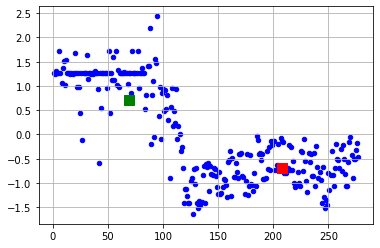

In [58]:
plt.scatter(DF.iloc[:,0], DF.iloc[:,1], s=20, c='b')
plt.scatter(208.,  -0.69951218, s = 100, c='r', marker='s')
plt.scatter(69.5,   0.70458111, s = 100, c='g', marker='s')
plt.grid()

I construct a scatter plot that shows the two Clusters and the corresponding Centroids. The figure is obtained plotting on the X-axis the progressive number of portfolio positions against the related performance, on the Y-axis. Then the points highlighted in *red* and *green* represents the two cluster's centers.

Using the labels attribute of Kmeans i have highlited what are the clusters that characterize the data set and there is evidence of a binary clusterization. So the effective number of clusters is 2.

In [59]:
Kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Using the labels attribute of Kmeans i have highlited what are the clusters that characterize the data set and there is evidence of a binary clusterization. 
So the effective number of clusters is 2.

### 2.3 Extraction of the individual clusters and analysis of the distrubution

In order to extract the individual clusters i started by attaching an axtra-column on the data set, named *'labels'*. This column represents the cluster to which the value of the performance belonging to.

In [60]:
DF['labels'] = Kmean.labels_
DF

,dossier,performance,labels
0,1,1.267882,0
1,2,1.254036,0
2,3,1.308629,0
3,4,1.269738,0
4,5,1.261341,0
...,...,...,...
272,273,-0.499903,1
273,274,-0.499903,1
274,275,-0.327188,1
275,276,-0.177570,1


Then i construct the Cluster_0 data set by selecting the performance values that corresponds to the zero-label , so the result is a DataFrame that contains only the performance values characterizing the zero-label cluster.

In [61]:
cluster_0 = DF['labels']==0
cl_0 = DF[cluster_0==True]
cl_0

,dossier,performance,labels
0,1,1.267882,0
1,2,1.254036,0
2,3,1.308629,0
3,4,1.269738,0
4,5,1.261341,0
...,...,...,...
133,134,-1.459582,0
134,135,-1.396692,0
135,136,-0.836756,0
136,137,-0.641353,0


I do the same job for the label equal to 1.

In [62]:
cluster_1 = DF['labels'] == 1
cl_1 = DF[cluster_1] 
cl_1

,dossier,performance,labels
138,139,-0.613052,1
139,140,-0.676095,1
140,141,-0.597753,1
141,142,-1.164701,1
142,143,-0.646216,1
...,...,...,...
272,273,-0.499903,1
273,274,-0.499903,1
274,275,-0.327188,1
275,276,-0.177570,1


After had identify the two cluster data set i have plotted a scatter plot that shows the two and the relative centroids. In addiction the two clusters were highlighetd following a colour rule according to the *labels*. 

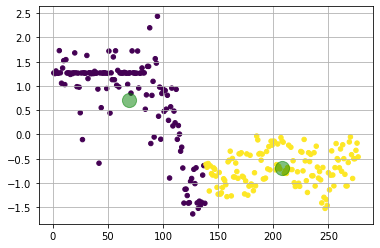

In [63]:
plt.scatter(DF.iloc[:, 0], DF.iloc[:, 1], c=DF['labels'], s=20, cmap='viridis')
centers = Kmean.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='g', s=200, alpha=0.5);
plt.grid()

I have also recovered what are all the statistics of the clusters.

In [64]:
print("\nSummary statistics cl_0 \n", cl_0.describe())
print("\nSummary statistics cl_1\n", cl_1.describe())



Summary statistics cl_0 
           dossier  performance  labels
count  138.000000   138.000000   138.0
mean    69.500000     0.704581     0.0
std     39.981246     0.946462     0.0
min      1.000000    -1.636722     0.0
25%     35.250000     0.312620     0.0
50%     69.500000     1.243975     0.0
75%    103.750000     1.269797     0.0
max    138.000000     2.436417     0.0

Summary statistics cl_1
           dossier  performance  labels
count  139.000000   139.000000   139.0
mean   208.000000    -0.699512     1.0
std     40.269923     0.348431     0.0
min    139.000000    -1.523419     1.0
25%    173.500000    -0.941571     1.0
50%    208.000000    -0.722266     1.0
75%    242.500000    -0.403698     1.0
max    277.000000    -0.032814     1.0


From the statistics is it possible to see that the clusters have:
  * **mean values =  208.000000  ,  -0.699512**   
  * **mean values = 69.500000   ,  0.7045819**

values that corresponds to the centroids found with the Kmeans method. 

<AxesSubplot:title={'center':'performance'}, ylabel='Frequency'>

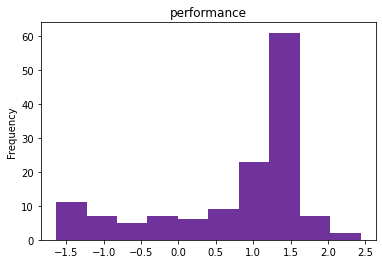

In [65]:
cl_0['performance'].plot(kind = 'hist', title = 'performance', alpha = 0.8, color='indigo')

<AxesSubplot:title={'center':'performance'}, ylabel='Frequency'>

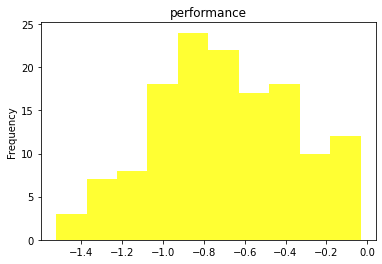

In [66]:
cl_1['performance'].plot(kind = 'hist', title = 'performance', alpha = 0.8, color='yellow')

Finally in the previous code are plotted the frequency distribution of portfolio's positions. 
Also in this case differentiate colours underline the two clusters distribution. 

In the contest of portoflio management, could happen that the sample presents some clusters. The explanation of this fact could be that if the investors shows the same behaviour and are free to open and close the position whenever they think is a good strategy. So this explain the presence of clusters in the performance distribution.

## 3) Elbow method

The elbow method is a popular approach for determining the number of clusters. The k-means algorithm is carried out for a range of values of k (e.g., all values between 1 and 10). 
The inertia is then plotted against the number of clusters, the latter measures the performance of the algorithm as the within-cluster sum of squares. For any given value of k, the objective of the k-means algorithm should be to minimize the inertia.

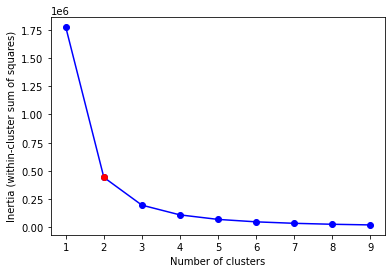

In [67]:
Ks = range(1, 10)
inertia = [KMeans(i).fit(DF).inertia_ for i in Ks] #9 different k model X is our data if i increase the number of cluster the inertia diminuits

fig = plt.figure() #plot the number of cluster wrt the inertia
plt.plot(Ks, inertia, '-bo')
plt.plot(2,442923.9769297391, color='red', marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

The inertia is then plotted against the number of clusters. The slope of the line in this chart indicates how the within-cluster sum of squares declines as the number of clusters increases.

In addition to the within-cluster sum of squares, we are likely to be interested in how distinct the clusters are. If two clusters are very close together we might reasonably conclude that not much is gained by
keeping them separate.

In this case, the decline is large when we move from one to two, very small from two to three, and three to four
clusters and so on. After two clusters, the decline is much smaller. We conclude that the **optimal number of clusters is 2** (the point highlighted in red) .

### Elbow method suggest a number of cluster , k = 2

In [68]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(DF)

# print inertia & cluster center
print("inertia for k=2 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=2 is 442923.9769297391
cluster centers:  [[ 2.08000000e+02 -6.99512181e-01  1.00000000e+00]
 [ 6.95000000e+01  7.04581110e-01  5.55111512e-16]]
cluster labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


So performing the Elbow method we have found that the best performance of the algorithm, so the value of the **Inertia = 442923.97** is obtained with a number of cluster equal to **2**. The relative Centroids are:
* **(208., -0.69951218)** 
* **(69.5, 0.70458111 )**.

### List of the results

In [69]:
result = pd.DataFrame({#'dossier':DF['dossier'], 
                       'Perform': DF['performance'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3 ):
    print(result.sort_values('Label'))

      Perform  Label
138 -0.613052      0
175 -0.400182      0
176 -1.251267      0
177 -1.064380      0
178 -0.428299      0
179 -1.020283      0
180 -1.042083      0
181 -1.159069      0
182 -0.788555      0
183 -1.057666      0
184 -0.032814      0
185 -0.111608      0
186 -0.402936      0
187 -0.389631      0
188 -0.529876      0
174 -0.958193      0
189 -0.404459      0
191 -0.914528      0
192 -0.898534      0
193 -0.350165      0
194 -0.708744      0
195 -0.248925      0
196 -0.728871      0
197 -0.137602      0
198 -0.219652      0
199 -0.137647      0
200 -0.140584      0
201 -0.728559      0
202 -0.620610      0
203 -0.195559      0
204 -0.657690      0
190 -0.916354      0
173 -1.224896      0
172 -0.879642      0
171 -0.860471      0
140 -0.597753      0
141 -1.164701      0
142 -0.646216      0
143 -0.806266      0
144 -0.834597      0
145 -0.688507      0
146 -0.716297      0
147 -0.857489      0
148 -1.089148      0
149 -1.229844      0
150 -0.782402      0
151 -1.228936

## 4) Silhouette Analysis

Another way of choosing the number of clusters is the silhouette method. Again, the k-means algorithm is carried out for a range of values of k. For each value of k, is calculated for each observation, i, the average distance between the observation and the other observations in the cluster to which it belongs, defined (ai), and the average distance between the observation and the observations in that cluster, (bi).
The silhouette of an observation measures the extent to which b(i) is greater than a(i).

The silhouette, s(i), lies between −1 and +1. (As already indicated, for observations that have been allocated correctly it is likely to be positive.) As it becomes closer to +1, the observation more clearly belongs
to the group to which it has been assigned. 

The average of s(i) over all observations in all clusters is an overall measure of the appropriateness of the clustering and is
referred to as **the average silhouette score**.

In [70]:
# Silhouette Analysis
range_n_clusters = [2,3,4,5,6,7,8,9,10]
silhouette       = [] 
for n_clusters in range_n_clusters:
    clusterer=KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels=clusterer.fit_predict(DF)
    silhouette_avg=silhouette_score(DF,cluster_labels)
    silhouette.append(silhouette_avg)
    print("For n_clusters=", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters= 2 The average silhouette_score is : 0.6239673851913099
For n_clusters= 3 The average silhouette_score is : 0.5852844748579087
For n_clusters= 4 The average silhouette_score is : 0.5654459768956089
For n_clusters= 5 The average silhouette_score is : 0.5525919480382384
For n_clusters= 6 The average silhouette_score is : 0.5436210321850538
For n_clusters= 7 The average silhouette_score is : 0.5367854167184312
For n_clusters= 8 The average silhouette_score is : 0.5304399383615608
For n_clusters= 9 The average silhouette_score is : 0.5251254713767451
For n_clusters= 10 The average silhouette_score is : 0.5203520100232777


So the best choice of k is the one that allow the higher average silhouette score. In this case **K = 2**.

 the number of cluster start inertia decrease is 2


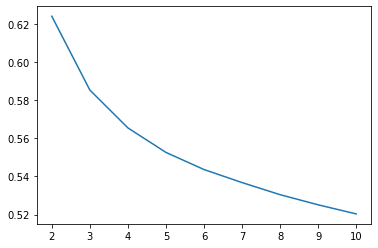

In [71]:
plt.plot(range_n_clusters, silhouette)
print(' the number of cluster start inertia decrease is 2')

From this plot is possible to figure out that the best number of cluster is 2, since the silhoutte score starts to decrease very fast after it.